In [2]:
# Illustrate imputation of an N*D partially observed data matrix by fitting a Gaussian using EM and then predicting missing entries
# authors: Drishttii@, murphyk@

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import probml_utils.gauss_utils as gauss


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(4)

/home/patel_karm/probml-utils/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


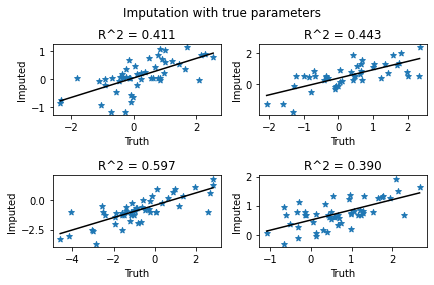

/home/patel_karm/probml-utils/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


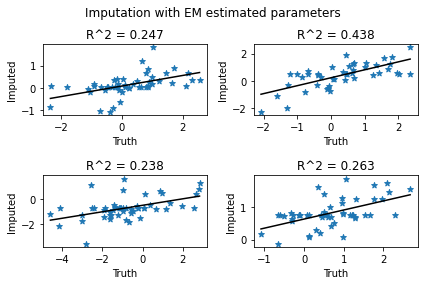

In [3]:
data_dim = 4
n_data = 100
threshold_missing = 0.5
mu = np.random.randn(data_dim, 1)
sigma = make_spd_matrix(n_dim=data_dim)
x_full = gauss.gauss_sample(mu, sigma, n_data)
missing = np.random.rand(n_data, data_dim) < threshold_missing
x_miss = np.copy(x_full)
x_miss[missing] = np.nan

x_impute_oracle = gauss.gauss_impute(mu, sigma, x_miss)

result = gauss.gauss_fit_em(x_miss)
m = result.get("mu")
sig = result.get("Sigma")
x_impute_em = gauss.gauss_impute(m, sig, x_miss)


def plot_performance(x_miss, x_full, x_impute):
    r_squared = []
    for i in range(4):
        miss = np.argwhere(np.isnan(x_miss[:, i]))
        r2 = r2_score(x_full[miss, i], x_impute[miss, i])
        r_squared.append(r2)

    fig, axs = plt.subplots(nrows=2, ncols=2)
    axs = axs.reshape(4)
    reg = LinearRegression()
    for i in range(4):
        miss = np.argwhere(np.isnan(x_miss[:, i]))
        min = x_full[miss, i].min()
        max = x_full[miss, i].max()
        xtest = np.linspace(min, max, 50).reshape(-1, 1)
        model = reg.fit(x_full[miss, i], x_impute[miss, i])
        line = model.predict(xtest)

        ax = axs[i]
        ax.plot(xtest, line, color="black")
        ax.scatter(x_full[miss, i], x_impute[miss, i], marker="*")
        ax.set_title("R^2 = %5.3f" % (r_squared[i]))
        ax.set_xlabel("Truth")
        ax.set_ylabel("Imputed")
        plt.tight_layout()
    return fig


fig = plot_performance(x_miss, x_full, x_impute_oracle)
fig.suptitle("Imputation with true parameters")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
pml.savefig("gauss_impute_scatter_truth.pdf")
plt.show()


fig = plot_performance(x_miss, x_full, x_impute_em)
fig.suptitle("Imputation with EM estimated parameters")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
pml.savefig("gauss_impute_scatter_em.pdf")
plt.show()